In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



In [87]:
trainDf = pd.read_csv('PQC_train.csv')
testDf = pd.read_csv('PQC_test.csv')

print(trainDf.head())


   Game_ID                   Game_Name  Released_Year Game_Type  \
0     9048                         NaN    2010.866185  BaseGame   
1    40086          Going The Distance    1999.742001  BaseGame   
2    12545                      Inside    2006.099268  BaseGame   
3    62639                         NaN    2022.149240  BaseGame   
4    26419  Shift: The Single Card CCG    1980.874850  BaseGame   

     Age_Category  Min_Players  Max_Players  Average_Complexity  \
0         under 5     2.063485     6.972730            3.393361   
1         under 5     2.024560     8.083061                 NaN   
2   5 to under 12     1.904577     2.252234            1.987593   
3  12 to under 18     0.998837     4.478198            2.401989   
4   5 to under 12     1.049099     2.563767            2.953464   

   Complexity_Raters  Average_Play_Time  Owner_Number  Trader_Number  \
0         230.948365         122.783903   2645.455635      70.467538   
1         -31.604440          61.738091    -55.070

In [88]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22812 entries, 0 to 22811
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game_ID              22812 non-null  int64  
 1   Game_Name            21665 non-null  object 
 2   Released_Year        21671 non-null  float64
 3   Game_Type            21671 non-null  object 
 4   Age_Category         21671 non-null  object 
 5   Min_Players          21671 non-null  float64
 6   Max_Players          21671 non-null  float64
 7   Average_Complexity   21671 non-null  float64
 8   Complexity_Raters    21671 non-null  float64
 9   Average_Play_Time    21671 non-null  float64
 10  Owner_Number         21671 non-null  float64
 11  Trader_Number        21671 non-null  float64
 12  HighInterest_Number  21671 non-null  float64
 13  Interest_Number      21671 non-null  float64
 14  Rater_Number         21671 non-null  float64
 15  Comment_Number       21671 non-null 

In [89]:
#Categorical Features

label = LabelEncoder()

print(f"Train Categorical : {trainDf.select_dtypes(include='object').columns}")
print(f"Test Categorical : {testDf.select_dtypes(include='object').columns}")



Train Categorical : Index(['Game_Name', 'Game_Type', 'Age_Category'], dtype='object')
Test Categorical : Index(['Game_Name', 'Game_Type', 'Age_Category'], dtype='object')


In [90]:
#handling Categorical Features

for col in trainDf.select_dtypes(include='object').columns:
    trainDf[col] = label.fit_transform(trainDf[col])

for col in testDf.select_dtypes(include='object').columns:
    testDf[col] = label.fit_transform(testDf[col])

print(trainDf.head())
print(testDf.head())

   Game_ID  Game_Name  Released_Year  Game_Type  Age_Category  Min_Players  \
0     9048      20301    2010.866185          0             4     2.063485   
1    40086       7428    1999.742001          0             4     2.024560   
2    12545       8660    2006.099268          0             3     1.904577   
3    62639      20301    2022.149240          0             0     0.998837   
4    26419      15110    1980.874850          0             3     1.049099   

   Max_Players  Average_Complexity  Complexity_Raters  Average_Play_Time  \
0     6.972730            3.393361         230.948365         122.783903   
1     8.083061                 NaN         -31.604440          61.738091   
2     2.252234            1.987593         -16.699059           7.007170   
3     4.478198            2.401989          -2.565285          69.042747   
4     2.563767            2.953464          -9.404579         118.814781   

   Owner_Number  Trader_Number  HighInterest_Number  Interest_Number  \
0 

In [91]:
nullTraVal = trainDf.isnull().sum
nullTestVal = testDf.isnull().sum

print(f"Train Null : {nullTraVal}")
print(f"Test nulls : {nullTestVal}")

Train Null : <bound method DataFrame.sum of        Game_ID  Game_Name  Released_Year  Game_Type  Age_Category  \
0        False      False          False      False         False   
1        False      False          False      False         False   
2        False      False          False      False         False   
3        False      False          False      False         False   
4        False      False          False      False         False   
...        ...        ...            ...        ...           ...   
22807    False      False          False      False         False   
22808    False      False          False      False         False   
22809    False      False           True      False         False   
22810    False      False          False      False         False   
22811    False      False          False      False         False   

       Min_Players  Max_Players  Average_Complexity  Complexity_Raters  \
0            False        False               False  

In [92]:
#Handlinhg Missing

trainDf = trainDf.fillna(trainDf.mean())
testDf = testDf.fillna(testDf.mean())

print(trainDf.head())
print(testDf.head())

   Game_ID  Game_Name  Released_Year  Game_Type  Age_Category  Min_Players  \
0     9048      20301    2010.866185          0             4     2.063485   
1    40086       7428    1999.742001          0             4     2.024560   
2    12545       8660    2006.099268          0             3     1.904577   
3    62639      20301    2022.149240          0             0     0.998837   
4    26419      15110    1980.874850          0             3     1.049099   

   Max_Players  Average_Complexity  Complexity_Raters  Average_Play_Time  \
0     6.972730            3.393361         230.948365         122.783903   
1     8.083061            1.986367         -31.604440          61.738091   
2     2.252234            1.987593         -16.699059           7.007170   
3     4.478198            2.401989          -2.565285          69.042747   
4     2.563767            2.953464          -9.404579         118.814781   

   Owner_Number  Trader_Number  HighInterest_Number  Interest_Number  \
0 

In [93]:
trainDf = trainDf.drop_duplicates()
testDf = testDf.drop_duplicates()

In [95]:
#Splitting

target = 'Average_Rating'

X_train = trainDf.drop(target,axis=1)
Y_train = trainDf[target]

X_test = testDf
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)


(2001, 16)
(22812, 16)
(22812,)


In [96]:
#Scaling

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)

(2001, 16)
(22812, 16)
(22812,)


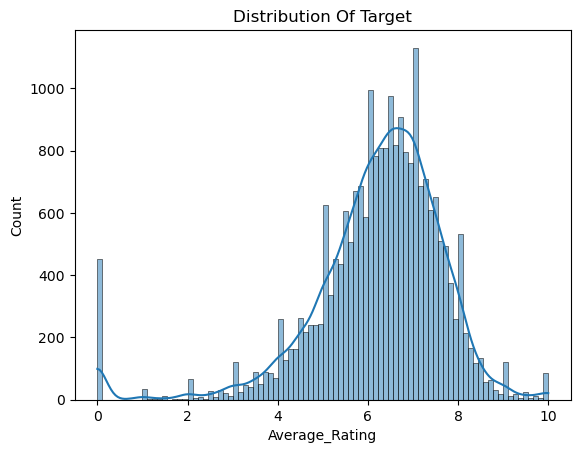

In [97]:
#Imbalance Checking

sns.histplot(trainDf['Average_Rating'],kde=True)
plt.title("Distribution Of Target")
plt.show()

In [98]:
testDf.head()

,Game_ID,Game_Name,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number
0,44623,977,1993,1,4,2,4,3.0000,1,120,22,1,0,0,6,3
1,12867,1834,2010,0,0,2,6,1.6364,22,60,579,38,2,13,294,70
2,12422,1007,2003,0,0,2,4,2.0488,41,90,725,69,7,20,311,139
3,29246,249,2006,1,3,2,2,2.4545,33,30,1377,60,40,68,348,177
4,20060,649,2002,0,0,2,8,1.0000,1,60,5,0,0,0,2,1


In [99]:
#Linear Regression

lr = LinearRegression()
lr.fit(X_train,Y_train)

yTrainPred = lr.predict(X_train)
yTestPred = lr.predict(X_test)

mseTrain = mean_squared_error(Y_train,yTrainPred)
print(f"MSE Train : {mseTrain}")

MSE Train : 1.8830378381321216


In [100]:
#DecisiionTreeRegressort

dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

yTrainPred = dt.predict(X_train)
yTestPred = dt.predict(X_test)

mseTrain = mean_squared_error(Y_train,yTrainPred)
print(f"MSE Train : {mseTrain}")

MSE Train : 1.037428860101278e-34


In [104]:
#RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

yTrainPred = rf.predict(X_train)
yTestPredRF = rf.predict(X_test)

mseTrain = mean_squared_error(Y_train,yTrainPred)
print(f"MSE Train : {mseTrain}")

MSE Train : 0.21986602679372588


In [105]:
yTestPredRF

array([7.2130267, 6.2061437, 6.1416872, ..., 7.0427871, 7.5970991,
       5.1597846])

In [110]:
gameIDs = testDf['Game_ID']
predictions = yTestPredRF

dfra = {'Game_ID':gameIDs,
        'testPredictions':predictions}

dfra = pd.DataFrame(dfra)
dfra.to_csv('RandomForest.csv',index=False)